# Assignment 2 - Unsupervised Learning

Machine Learning (BBWL), Michael Mommert, FS2023, University of St. Gallen

The **goal** of this assignment is to perform clustering on **two separate datasets**: `blobs` contains a number of Gaussian clusters, wheres `moons` contains two crescent-shaped clusters that are intertwined. Both datasets are two-dimensional and contain different numbers of samples.

Your **objectives** are the following:
* Visualize both datasets.
* Implement at least one clustering method to identify clusters in the `blobs` dataset; how many different clusters are there in the dataset?
* Implement at least one clustering method that separates the vast majority of samples from the two crescent-shaped clusters in the `moons` dataset.
* For each dataset, visualize the resulting clusters by plotting samples belonging to different clusters in different colors.

This assignment will be **graded** based on:
* whether these objectives have been achieved;
* whether the solution follows best practices;
* how well the approach is documented (e.g., using text cells, plots, etc.);
* how clean the code is.

There are no restrictions on the resources that you can use -- collaborating on assignments is allowed -- but students are not allowed to submit identical code.



-----

The following code cell will import the dataset used in this assignment. Please do not modify this code cell.

In [ ]:
import numpy as np
from urllib.request import urlopen
from io import BytesIO

# load data as binary npy file
blobs = np.load(BytesIO(urlopen("X").read()))
moons = np.load(BytesIO(urlopen("X").read()))

# 1. Dataset visualization

Let's begin by visualizing the two datasets. We'll start by displaying each dataset separately and then compare them side-by-side to better understand the differences between the two.

###1.1 Blobs Dataset visualization

Text(0.5, 1.0, 'blobs')

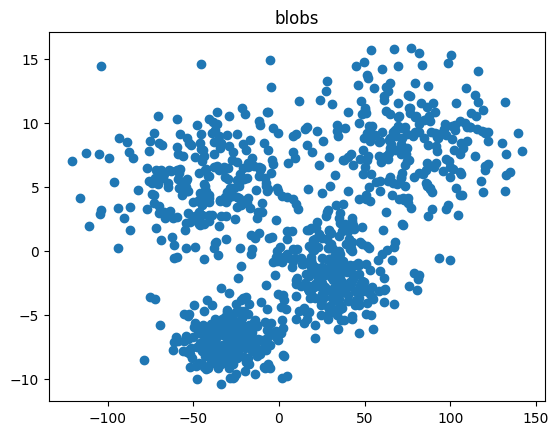

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

#create x and y for the plot
x_coordb = blobs[:, 0]
y_coordb = blobs[:, 1]

# plot blobs dataset
plt.scatter(x_coordb, y_coordb)
plt.title("blobs")


###1.2 Moons Dataset visualization

Text(0.5, 1.0, 'moons')

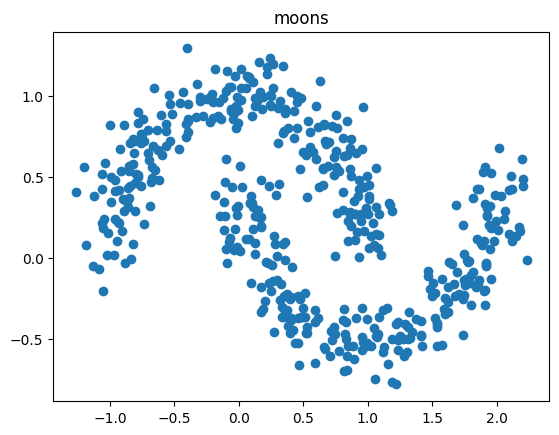

In [ ]:
#create x and y for the plot
x_coordm = moons[:, 0]
y_coordm = moons[:, 1]

#plot moons dataset
plt.scatter(x_coordm, y_coordm)
plt.title("moons")

### 1.3 Compare blobs and moons Dataset

Text(0.5, 1.0, 'Moons')

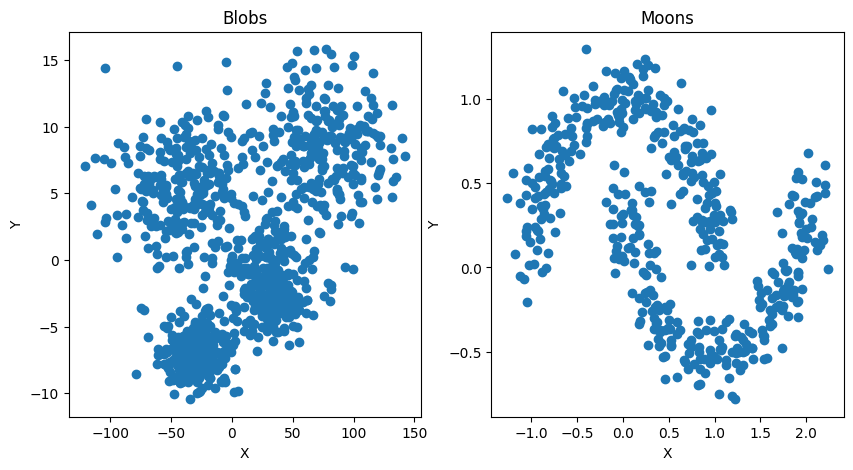

In [ ]:
# create plot to compare blobs and moons
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# blobs plot
ax1.scatter(x_coordb, y_coordb)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_title("Blobs")

# moons plot
ax2.scatter(x_coordm, y_coordm)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_title("Moons")

By visualizing the Blobs Dataset, you can see that it consists of approximately 4 clusters. The moons dataset consists of 2 crescent shaped clusters.

Next we will take a closer look at the two data sets and apply 4 Clustering-Methods:


*   k-Means
*   EM-Clustering
*   Hierarchical Clustering
*   DBSCAN





# 2. Clustering on `blobs`

###2.1 K-means Clustering
First we will use a centroid-based method namely K-means. The hyperparameter k determines the number of clusters. To find the optimal number we will compare different k's visually (Qualitative approach).

In [ ]:
# set random seed
random_seed = 9

Text(0.5, 1.0, 'K-Means; n_cluster= 2')

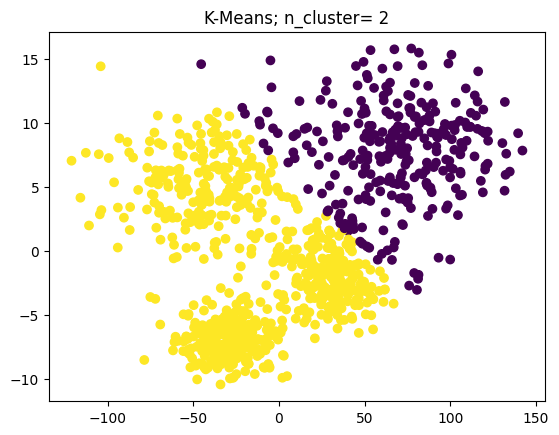

In [ ]:
# import libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# scale blobs dataset
scaler = StandardScaler()
blobs_scaled = scaler.fit_transform(blobs)

# train and apply k-Means
model = KMeans(n_clusters=2, n_init=random_seed)
pred = model.fit_predict(blobs_scaled)

#plot clustering
plt.scatter(x_coordb, y_coordb, c=pred)
plt.title("K-Means; n_cluster= 2")

It can be seen that k=2 is not the optimal set for clustering the blobs dataset. Let's try it with k from 1-6.

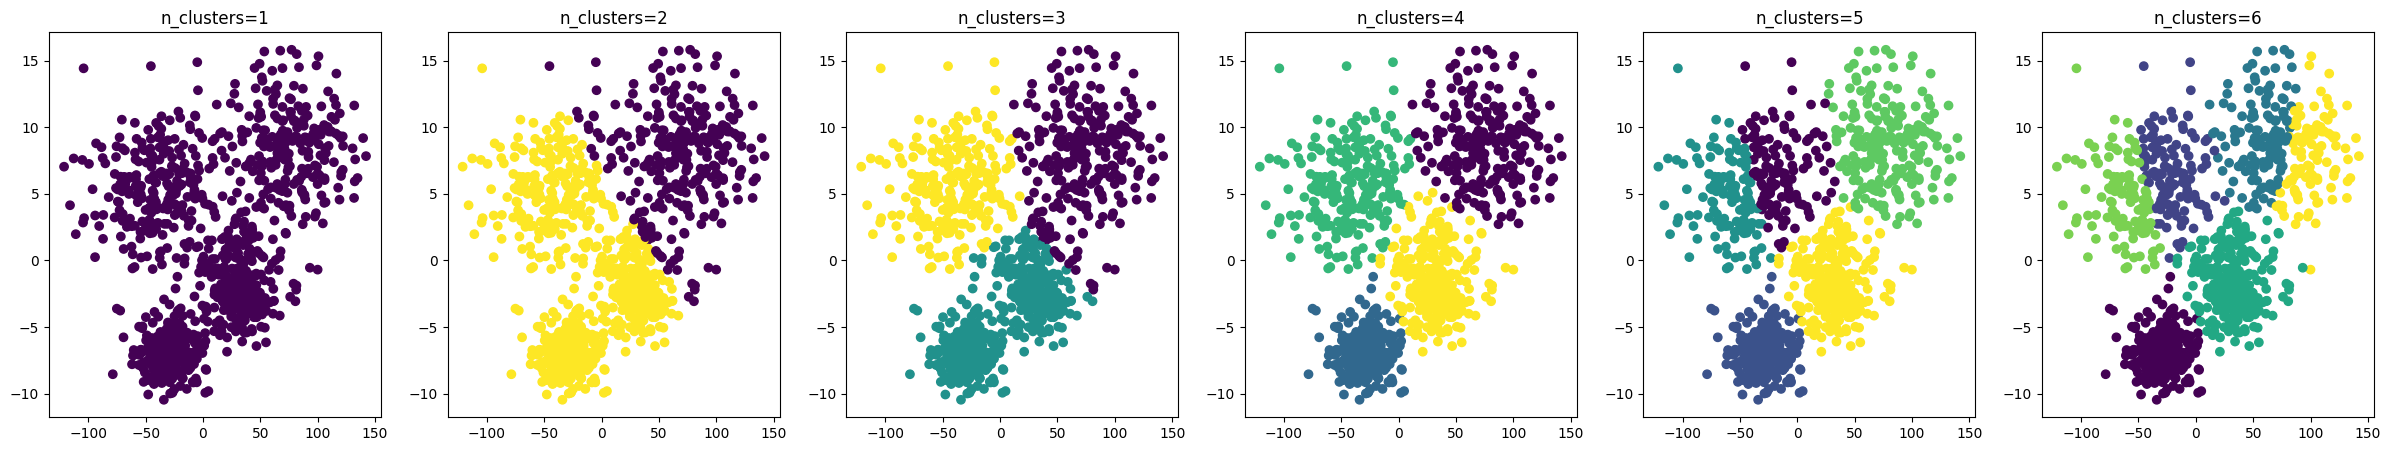

In [ ]:
# plot clustering for k
# how many different k get tested depends on columns in subplot; 6
f, ax = plt.subplots(1, 6, figsize=(30, 5))

# loop to apply K-Means for different k
for k, ax in enumerate(ax):
    model = KMeans(n_clusters=k+1, n_init=random_seed)
    pred = model.fit_predict(blobs_scaled)

    ax.scatter(x_coordb, y_coordb, c=pred)
    ax.set_title(f"n_clusters={k+1}")

plt.show()

k=4 shows a good, clearly definable segmentation of the clusters.

In the following sections, we will only consider k=3, k=4, k=5 for the other methods.

##2.2 EM-Clustering

EM clustering uses probabilistic assignment of data points to clusters, while k-means uses hard assignment based on closest centroid. Therefore, EM clustering provides a soft assignment where each data point has a probability associated with each cluster.

In [ ]:
#import GaussianMixture
from sklearn.mixture import GaussianMixture

# train and apply GaussianMixture with n_components=3
model = GaussianMixture(n_components=3, n_init=random_seed)
pred_G1 = model.fit_predict(blobs_scaled)

# train and apply GaussianMixture with n_components=4
model = GaussianMixture(n_components=4, n_init=random_seed)
pred_G2 = model.fit_predict(blobs_scaled)

# train and apply GaussianMixture with n_components=5
model = GaussianMixture(n_components=5, n_init=random_seed)
pred_G3 = model.fit_predict(blobs_scaled)

Text(0.5, 0.98, 'EM-Clustering')

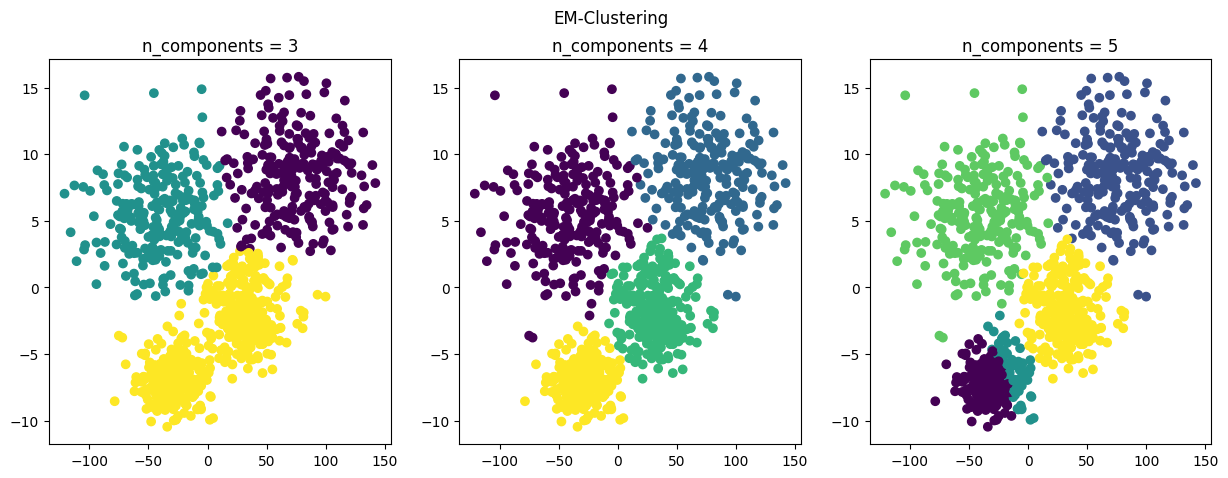

In [ ]:
#plot clustering for the 3 different n_components
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(x_coordb, y_coordb, c=pred_G1)
ax1.set_title("n_components = 3")

ax2.scatter(x_coordb, y_coordb, c=pred_G2)
ax2.set_title("n_components = 4")

ax3.scatter(x_coordb, y_coordb, c=pred_G3)
ax3.set_title("n_components = 5")

#add title
f.suptitle("EM-Clustering")

###2.2.1 Bayesian Information Criterion (BIC)

The BIC as a quantitative approach looks at models with different numbers of clusters and calculates a score based on how well the model fits the data and how complex the model is. We want to find the model with the lowest BIC score, which means it fits the data well without being too complex. This helps us choose the best number of clusters.

In the case of the blobs dataset the optimal number of clusters is k=4.


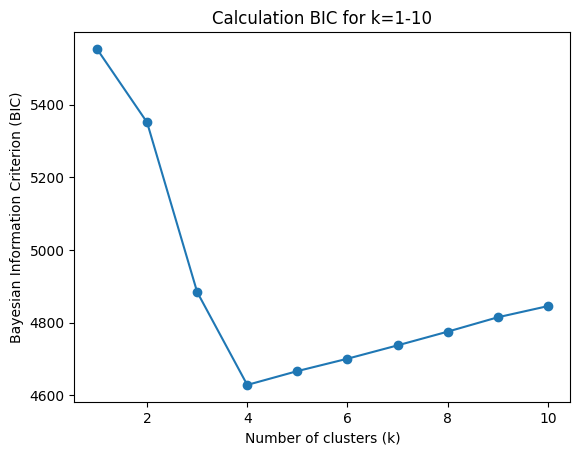

In [ ]:
# import numpy
import numpy as np

# range of k values
k_values = range(1, 11)

# array to store BIC scores
bic_scores = np.zeros(len(k_values))

# calculate BIC score for each k
for i, k in enumerate(k_values):
    model = GaussianMixture(n_components=k, n_init=random_seed)
    model.fit(blobs_scaled)
    bic_scores[i] = model.bic(blobs_scaled)

# plot BIC scores
plt.plot(k_values, bic_scores, "-o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Bayesian Information Criterion (BIC)")
plt.title("Calculation BIC for k=1-10")
plt.show()


## 2.3 Hierarchical Clustering

Agglomerative hierarchical clustering is a bottom-up approach for clustering data points. It is connectivity-based and assumes that data points that are close to each other are more likely to be part of the same cluster. The number of clusters found depends on the chosen hyperparameter k.

In [ ]:
#import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

# train and apply AgglomerativeClustering with n_cluster=3
model = AgglomerativeClustering(n_clusters=3)
pred_A1 = model.fit_predict(blobs_scaled)

# train and apply AgglomerativeClustering with n_clusters=4
model = AgglomerativeClustering(n_clusters=4)
pred_A2 = model.fit_predict(blobs_scaled)

# train and apply AgglomerativeClustering with n_clusters=5
model = AgglomerativeClustering(n_clusters=5)
pred_A3 = model.fit_predict(blobs_scaled)

Text(0.5, 0.98, 'Hierarchical Clustering')

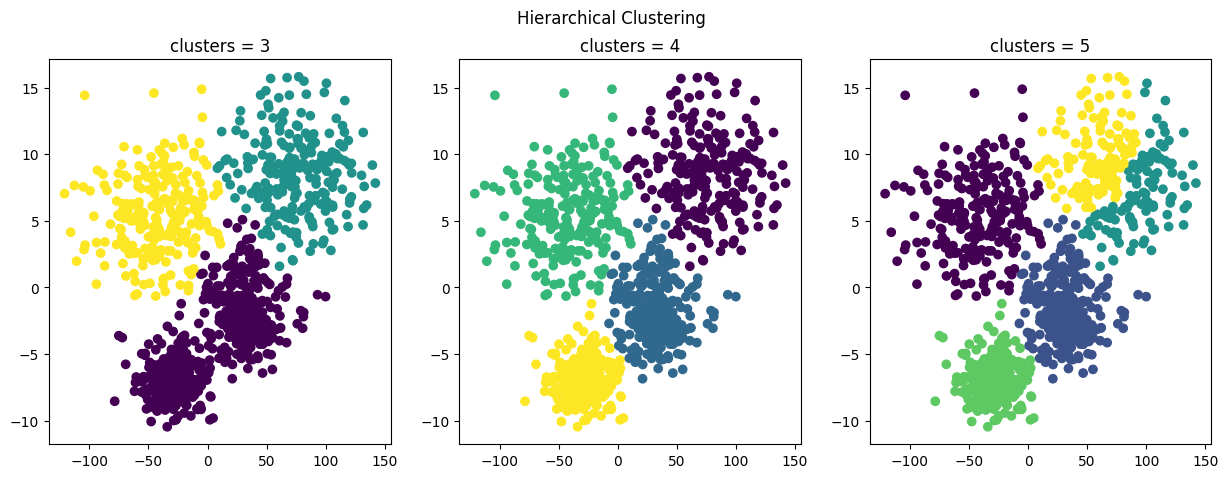

In [ ]:
# plot clustering for the 3 different n_clusters
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(x_coordb, y_coordb, c=pred_A1)
ax1.set_title("clusters = 3")

ax2.scatter(x_coordb, y_coordb, c=pred_A2)
ax2.set_title("clusters = 4")

ax3.scatter(x_coordb, y_coordb, c=pred_A3)
ax3.set_title("clusters = 5")

# add title
f.suptitle("Hierarchical Clustering")

##2.4 Compare the 3 different Clustering-Methods

In [ ]:
# train and apply KMeans for n_clusters =4 and save preditcion in a variable
model = KMeans(n_clusters=4, n_init=random_seed)
pred_K2 = model.fit_predict(blobs_scaled)

# train and apply KMeans for n_clusters =5 and save preditcion in a variable
model = KMeans(n_clusters=5, n_init=random_seed)
pred_K3 = model.fit_predict(blobs_scaled)

Text(0.5, 0.98, 'Compare different Clsutering-Methods for k=4')

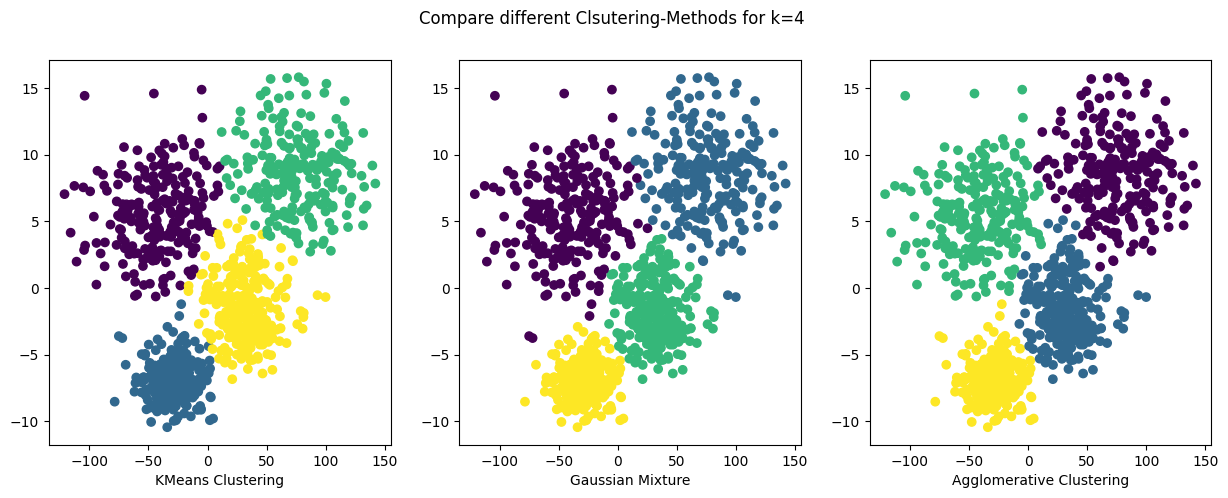

In [ ]:
# plot clustering for the 3 different Clustering-Methods, k=4
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# K-Mean
ax1.scatter(x_coordb, y_coordb, c=pred_K2)
ax1.set_xlabel("KMeans Clustering")

# Gaussian Mixture
ax2.scatter(x_coordb, y_coordb, c=pred_G2)
ax2.set_xlabel("Gaussian Mixture")

# Agglomerative Clustering
ax3.scatter(x_coordb, y_coordb, c=pred_A2)
ax3.set_xlabel("Agglomerative Clustering")

f.suptitle("Compare different Clsutering-Methods for k=4")

We can observe that, when setting k=4, the resulting clusters are highly similar across all three methods, except for a few data points. Let's compare it for k=5.

Text(0.5, 0.98, 'Compare different Clsutering-Methods for k=5')

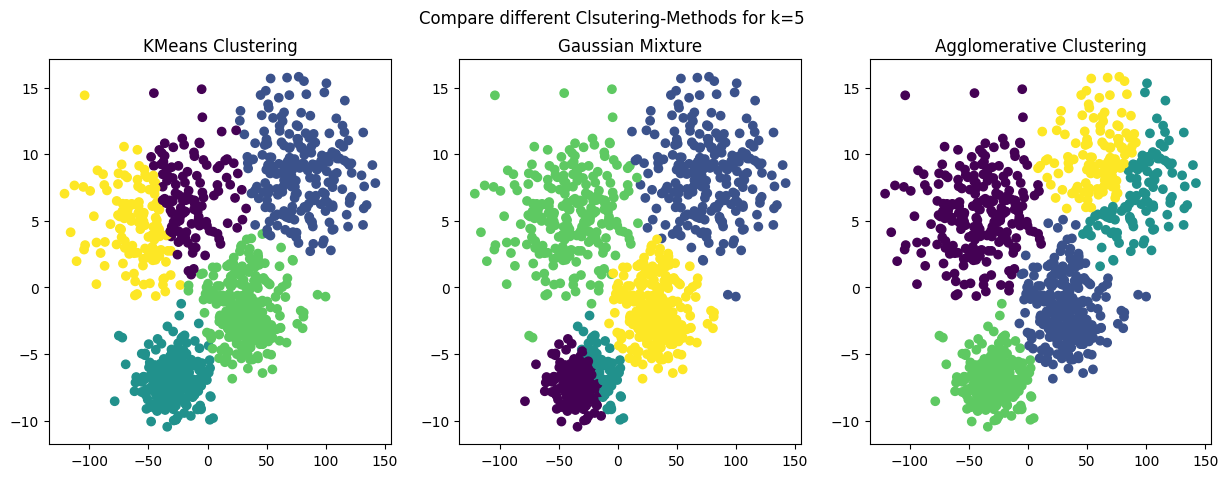

In [ ]:
# plot clustering for the 3 different Clustering-Methods, k=5
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# K-Mean
ax1.scatter(x_coordb, y_coordb, c=pred_K3)
ax1.set_title("KMeans Clustering")

# Gaussian Mixture
ax2.scatter(x_coordb, y_coordb, c=pred_G3)
ax2.set_title("Gaussian Mixture")

# Agglomerative Clustering
ax3.scatter(x_coordb, y_coordb, c=pred_A3)
ax3.set_title("Agglomerative Clustering")

# add title
f.suptitle("Compare different Clsutering-Methods for k=5")

In the above plot we can see that all three methods set the fifth cluster differently. In particular, the Gaussian mixture splits a visually very clear cluster.



## 2.5 DBSCAN

DBSCAN is a non-parametric clustering method that identifies clusters based on local density variations in the data. It includes the concept of noise, which refers to data points not belonging to any cluster. It uses two hyperparameters:

*   epsilon, which defines the distance within which to define a neighborhood
*   min_sample, the minimum number of data points required to form a cluster





In [ ]:
# import DBSAN
from sklearn.cluster import DBSCAN

# train and apply DBSCAN with eps=0.2 and min_sample=20
model = DBSCAN(eps=0.2, min_samples=20)
pred = model.fit_predict(blobs_scaled)

Text(0.5, 1.0, 'Clustering for: eps=0.5 ; min_samples=20')

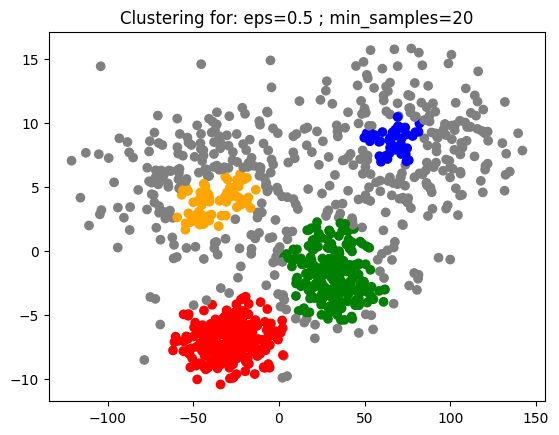

In [ ]:
# plot DBSCAN with different color, grey for Noise
plt.scatter(x_coordb, y_coordb, color=[{0: 'red', 1: 'green', 2: "blue", 3: "orange", -1:"grey"} [l] for l in pred])

# add title
plt.title("Clustering for: eps=0.5 ; min_samples=20")

We can observe that, with the currently selected values for epsilon and min_sample, the resulting clusters are notably smaller compared to the previous methods, with a large number of data points being classified as noise. We need to optimize the values for epsilon and min_sample to reduce the number of points that are considered noise.

### 2.5.1 Optimize DBSCAN


In [ ]:
# train and apply DBSCAN with eps=0.17 and min_sample=10
model = DBSCAN(eps=0.17, min_samples=10)
pred_DB1 = model.fit_predict(blobs_scaled)

Text(0.5, 1.0, 'Clustering for: eps=0.17 ; min_samples=10')

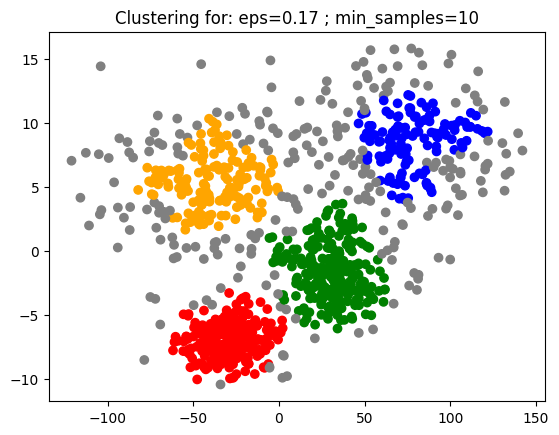

In [ ]:
# plot DBSCAN with different color, grey for Noise
plt.scatter(x_coordb, y_coordb, color=[{0: 'red', 1: 'green', 2: "blue", 3: "orange", -1:"grey"} [l] for l in pred_DB1])
plt.title("Clustering for: eps=0.17 ; min_samples=10")

## 2.6 Summary: Blobs dataset
In the analysis of the blobs dataset, four clustering methods were applied and the optimal number of clusters was determined to be 4 for each method.

This result was further supported by calculating the Bayesian Information Criterion (BIC), which provided a quantitative approach to validate the qualitative findings. Overall, both the qualitative and quantitative approaches indicated that 4 clusters were optimal for the blobs dataset.

---

Text(0.5, 0.98, 'Blobs dataset with 4 clusters')

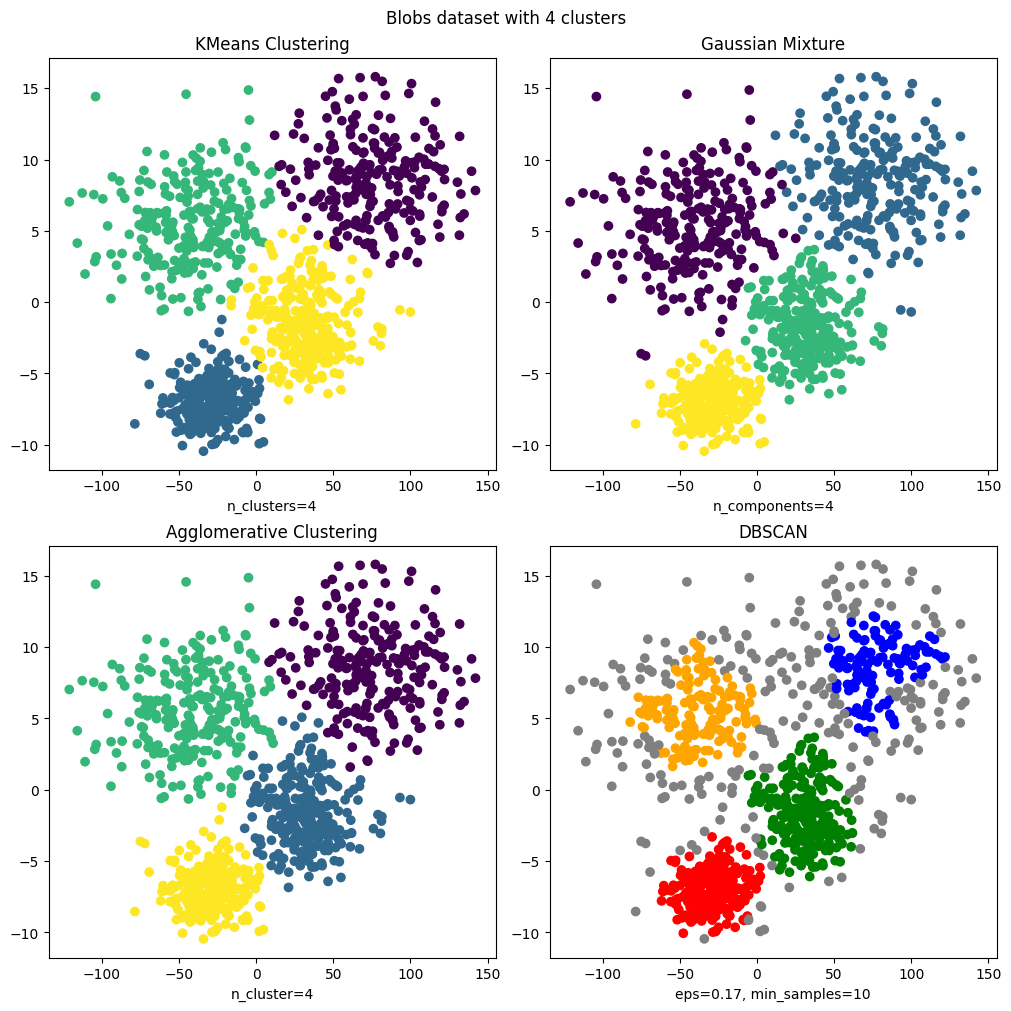

In [ ]:
# train and apply KMeans for n_clusters = 4 and save preditcion in a variable
model = KMeans(n_clusters=4, n_init=random_seed)
pred_K2 = model.fit_predict(blobs_scaled)

# plot all clustering Methods with 4 Clusters
f, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(10, 10), layout="constrained" )

# K-Means
ax1.scatter(x_coordb, y_coordb, c=pred_K2)
ax1.set_title('KMeans Clustering')
ax1.set_xlabel("n_clusters=4")

# Gaussian Mixture
ax2.scatter(x_coordb, y_coordb, c=pred_G2)
ax2.set_title('Gaussian Mixture')
ax2.set_xlabel("n_components=4")

# Agglomerative Clustering
ax3.scatter(x_coordb, y_coordb, c=pred_A2)
ax3.set_title('Agglomerative Clustering')
ax3.set_xlabel("n_cluster=4")

# DBSCAN, Noise in grey
ax4.scatter(x_coordb, y_coordb, color=[{0: 'red', 1: 'green', 2: "blue", 3: "orange", 4: "yellow", 5: "pink", 6: "violet", -1:"grey"} [l] for l in pred_DB1])
ax4.set_title("DBSCAN")
ax4.set_xlabel("eps=0.17, min_samples=10")

# add title
f.suptitle("Blobs dataset with 4 clusters")

# 3 Clustering on `moons`

##3.1 K-means Clustering

In [ ]:
#set random seed
random_seed = 9

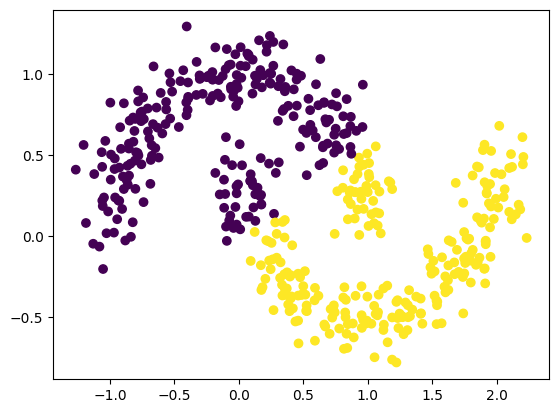

In [ ]:
# import Kmeans, StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# scale the data
scaler = StandardScaler()
moons_scaled = scaler.fit_transform(moons)

# train and apply k-Means
model = KMeans(n_clusters=2, n_init=random_seed)
pred = model.fit_predict(moons_scaled)

#plot
plt.scatter(x_coordm, y_coordm, c=pred)

We can see that k-means does not give an optimal result for k=2 and misidentifies the two clusters.

How will the cluster allocation change if we change k?

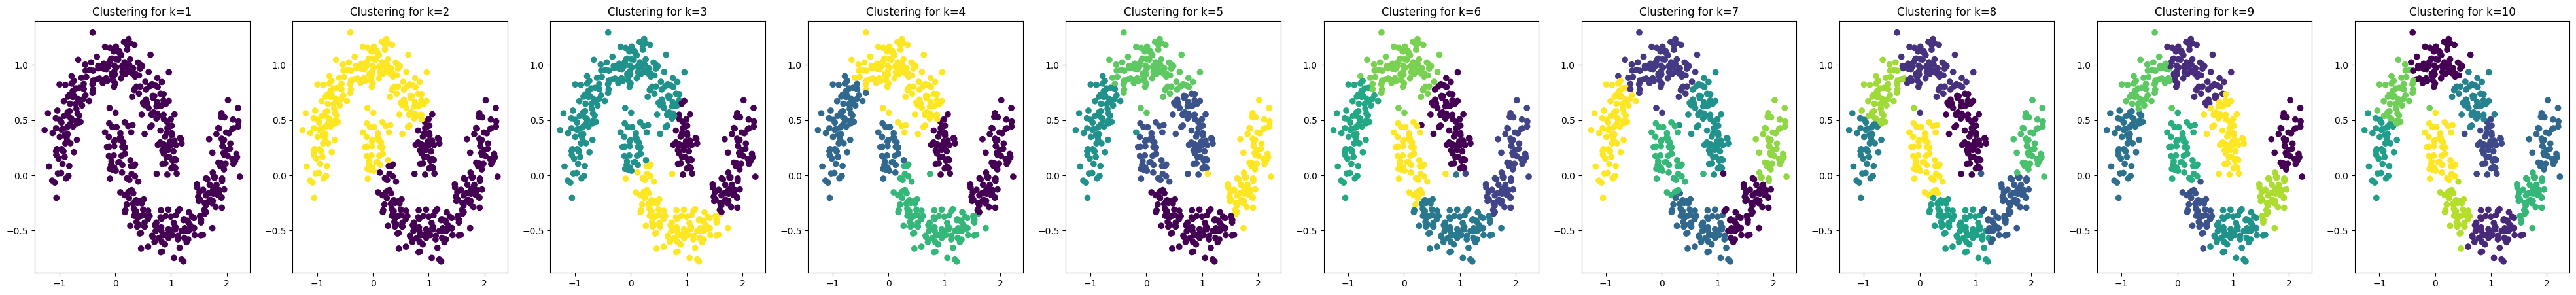

In [ ]:
# plot clustering for k
# how many different k get tested depends on columns in subplot; 10
f, ax = plt.subplots(1, 10, figsize=(50, 5))

# loop to apply K-Means for different k
for k, ax in enumerate(ax):
    model = KMeans(n_clusters=k+1, n_init=random_seed)
    pred = model.fit_predict(moons_scaled)

    ax.scatter(x_coordm, y_coordm, c=pred)
    ax.set_title(f"Clustering for k={k+1}")

plt.show()

### Why does k-mean not cluster well for the moons dataset?

In the case of crescent-shaped clusters, the distances between data points and their assigned centroids can be very large and misleading. This can result in k-means clustering assigning points to the wrong cluster, or splitting a crescent-shaped cluster into multiple smaller clusters.

---



##3.2 EM-Clustering


In [ ]:
# import Gaussian Mixture
from sklearn.mixture import GaussianMixture

# train and apply GaussianMixture with n_components=2
model = GaussianMixture(n_components=2, n_init=random_seed)
pred_G1 = model.fit_predict(moons_scaled)

# train and apply GaussianMixture with n_components=5
model = GaussianMixture(n_components=5, n_init=random_seed)
pred_G2 = model.fit_predict(moons_scaled)

# train and apply GaussianMixture with n_components=8
model = GaussianMixture(n_components=8, n_init=random_seed)
pred_G3 = model.fit_predict(moons_scaled)


Text(0.5, 0.98, 'EM-Clustering')

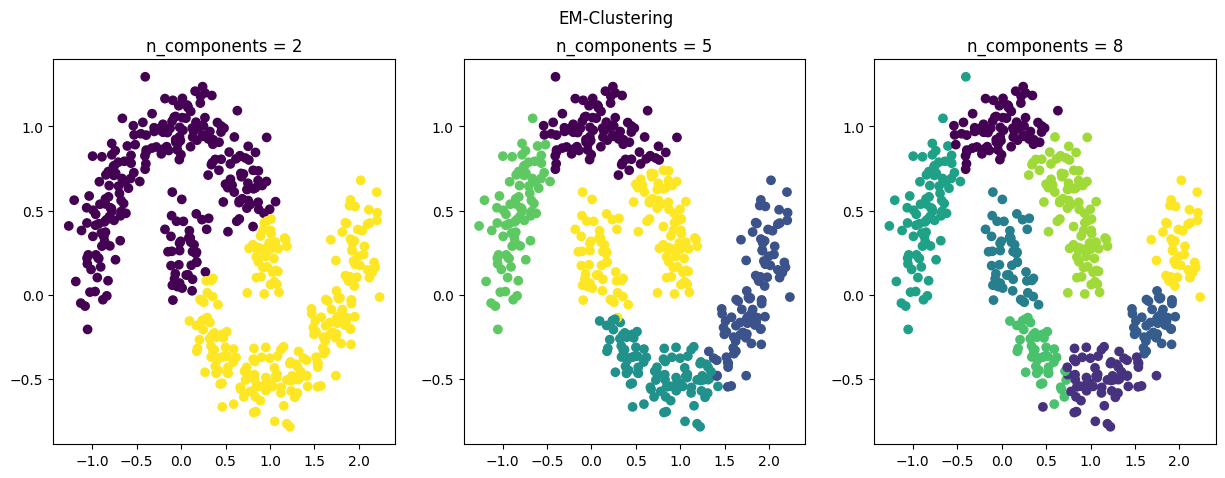

In [ ]:
# plot clustering for the 3 different n_components
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(x_coordm, y_coordm, c=pred_G1)
ax1.set_title("n_components = 2")

ax2.scatter(x_coordm, y_coordm, c=pred_G2)
ax2.set_title("n_components = 5")

ax3.scatter(x_coordm, y_coordm, c=pred_G3)
ax3.set_title("n_components = 8")

f.suptitle("EM-Clustering")

### Why does EM-Clustering not cluster well for the moons dataset?

In crescent-shaped clusters, the distribution of the data points is not symmetric, which violates the assumptions of a Gaussian mixture model (Distribution-based clustering, parametric clustering). As a result, EM clustering with a Gaussian mixture model fails to accurately identify the crescent-shaped clusters (k=2), and instead produce multiple small clusters (k=5, k=8).


---





##3.3 Hierarchical Clustering

In [ ]:
# import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

# train and apply AgglomerativeClustering with n_clusters=2
model = AgglomerativeClustering(n_clusters=2)
pred_A1 = model.fit_predict(moons_scaled)

# train and apply AgglomerativeClustering with n_clusters=5
model = AgglomerativeClustering(n_clusters=5)
pred_A2 = model.fit_predict(moons_scaled)

# train and apply AgglomerativeClustering with n_clusters=8
model = AgglomerativeClustering(n_clusters=8)
pred_A3 = model.fit_predict(moons_scaled)


Text(0.5, 0.98, 'Hierarchical Clustering')

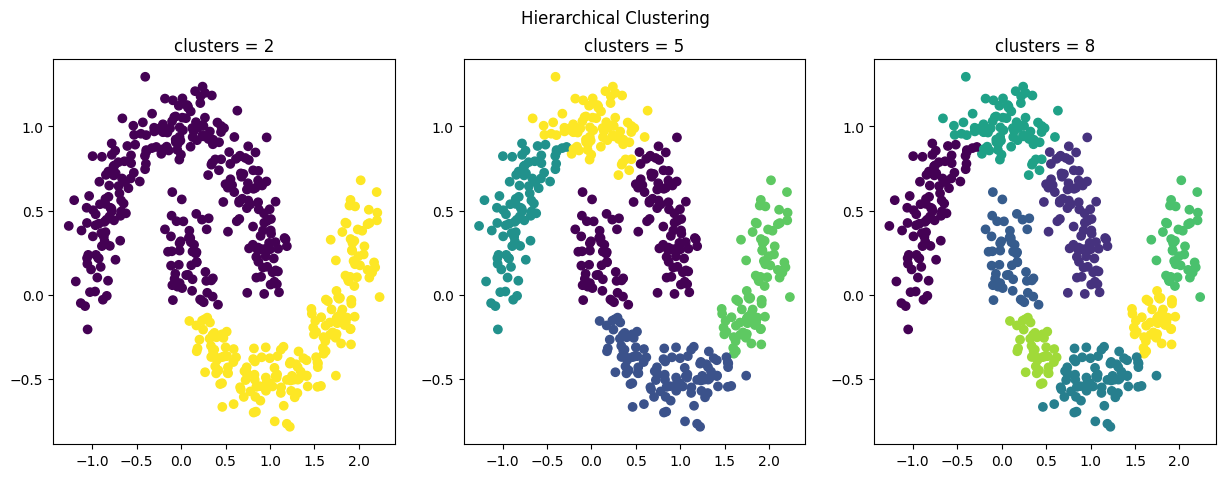

In [ ]:
# plot clustering for the 3 different n_clusters
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(x_coordm, y_coordm, c=pred_A1)
ax1.set_title("clusters = 2")

ax2.scatter(x_coordm, y_coordm, c=pred_A2)
ax2.set_title("clusters = 5")

ax3.scatter(x_coordm, y_coordm, c=pred_A3)
ax3.set_title("clusters = 8")

# add title
f.suptitle("Hierarchical Clustering")

### Why does Hierarchical Clustering not cluster well for the moons dataset?

Agglomerative clustering merges smaller clusters into larger ones based on their distance. It doesn't consider the local density of points and is based on the distance between points, rather than their structure. The moons dataset consists of two half-moon shapes that are close to each other, but not connected, which makes it difficult for agglomerative clustering to identify them as separate clusters, especially in the center.


---




##3.4 DBSCAN
In the following section we will apply DBSACN and try to find the optimal value of epsilon with min_sample = 10.

In [ ]:
# create a list from 0.05 - 0.5 with 0.05 steps
eps_list = [i/20 for i in range(1,11)]

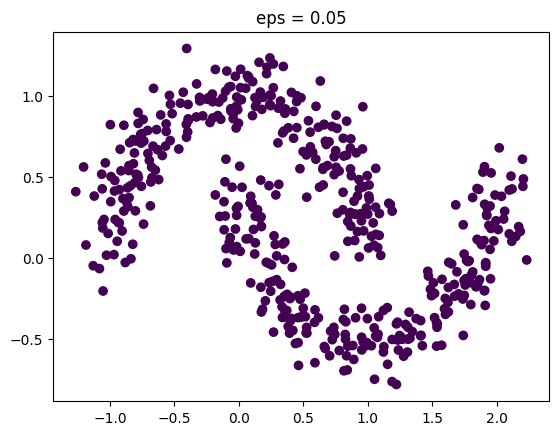

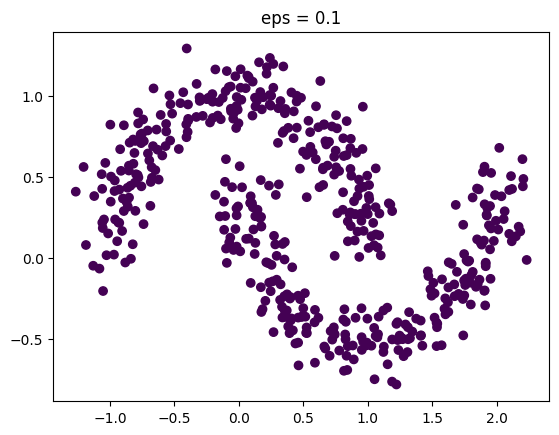

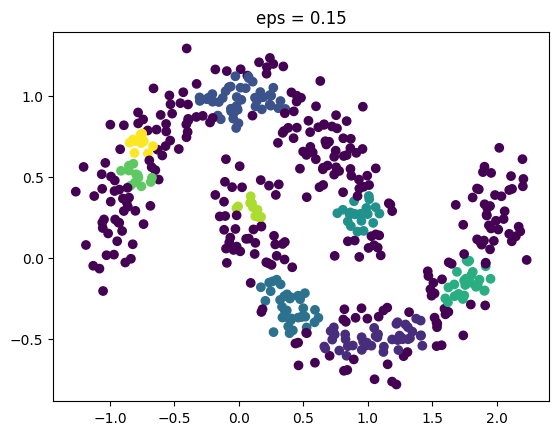

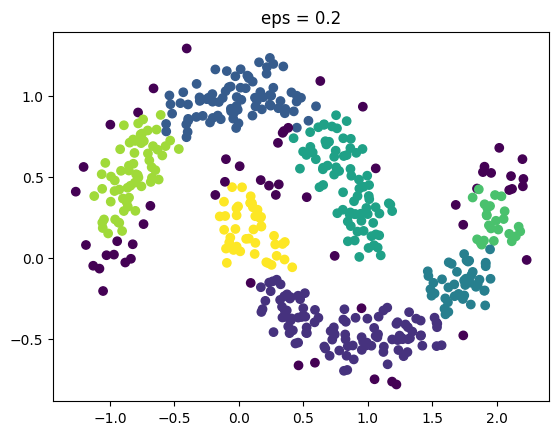

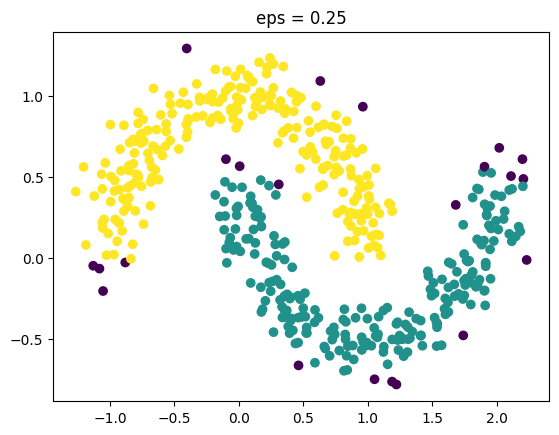

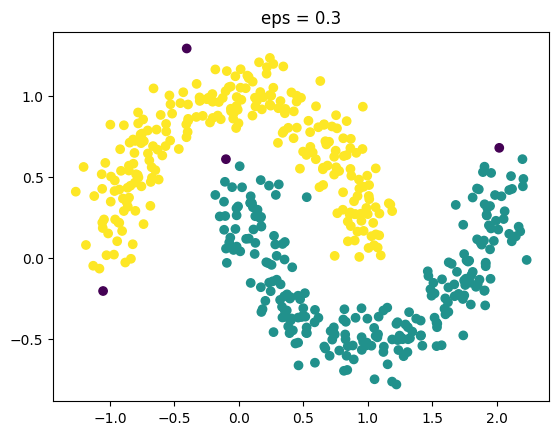

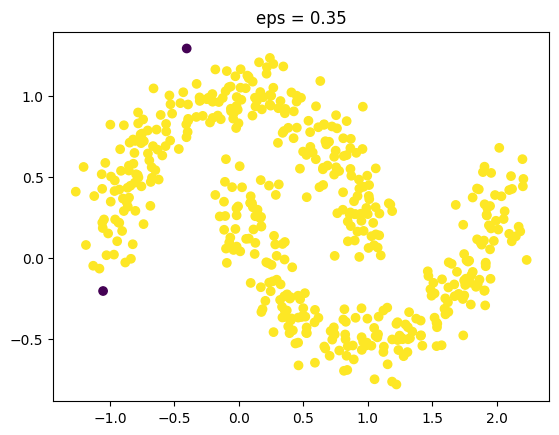

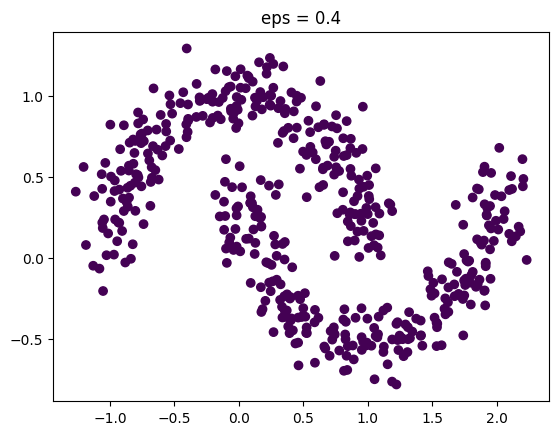

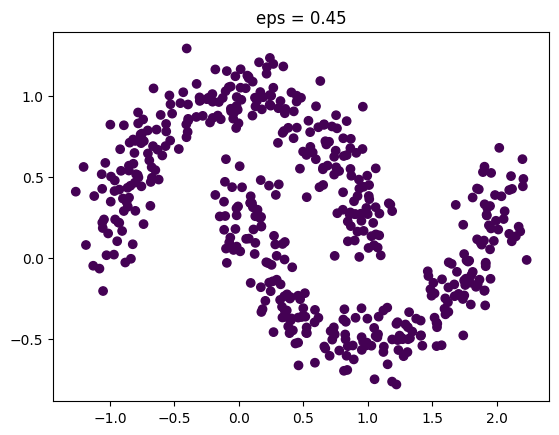

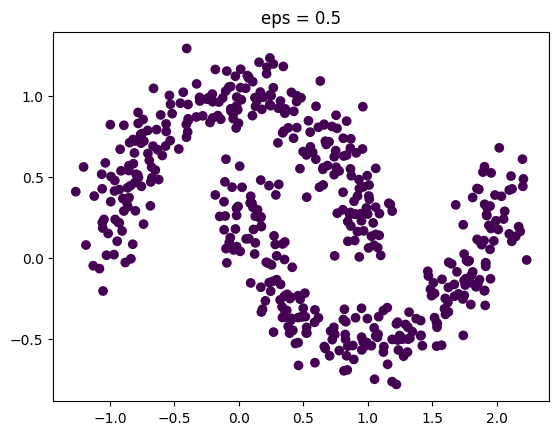

In [ ]:
# import DBSCAN
from sklearn.cluster import DBSCAN

# loop to iterate over eps_list and train, apply, plot DBSCAN based on the different eps value
for x in eps_list:
  model = DBSCAN(eps=x, min_samples=10)
  pred = model.fit_predict(moons_scaled)
  plt.scatter(x_coordm, y_coordm, c=pred)
  plt.title(f"eps = {x}")
  plt.show()


Looking at the graphs, we will now focus on a specific range of epsilon values, from 0.2 to 0.35.

In [ ]:
# train and apply DBSCAN with eps = 0.225
model = DBSCAN(eps=0.225, min_samples=10)
pred_DB1 = model.fit_predict(moons_scaled)

# train and apply DBSCAN with eps = 0.25
model = DBSCAN(eps=0.25, min_samples=10)
pred_DB2 = model.fit_predict(moons_scaled)

# train and apply DBSCAN with eps = 0.3
model = DBSCAN(eps=0.3, min_samples=10)
pred_DB3 = model.fit_predict(moons_scaled)

Text(0.5, 0.98, 'DBSCAN')

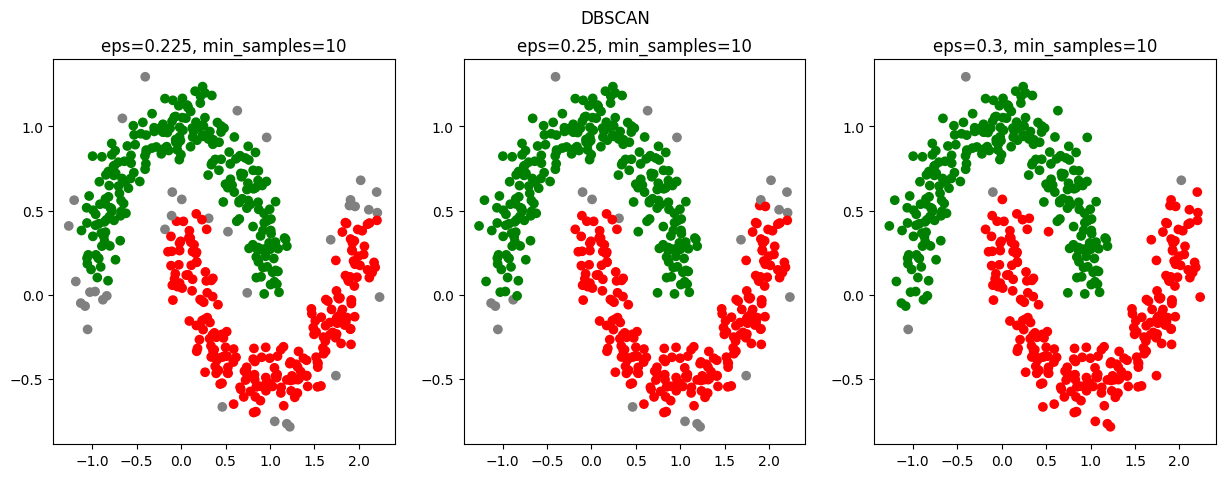

In [ ]:
# plot clustering for the 3 different eps
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.scatter(x_coordm, y_coordm, color=[{0: 'red', 1: 'green', 2: "blue", 3: "orange", 4: "yellow", 5: "pink", 6: "violet", -1:"grey"} [l] for l in pred_DB1])
ax1.set_title("eps=0.225, min_samples=10")

ax2.scatter(x_coordm, y_coordm, color=[{0: 'red', 1: 'green', 2: "blue", 3: "orange", 4: "yellow", 5: "pink", 6: "violet", -1:"grey"} [l] for l in pred_DB2])
ax2.set_title("eps=0.25, min_samples=10")

ax3.scatter(x_coordm, y_coordm, color=[{0: 'red', 1: 'green', 2: "blue", 3: "orange", 4: "yellow", 5: "pink", 6: "violet", -1:"grey"} [l] for l in pred_DB3])
ax3.set_title("eps=0.3, min_samples=10")

f.suptitle("DBSCAN")

We can see that for eps=0.255 and 0.3 the noise in the center is detected a little better than with eps = 0.25. Therefore, we will focus on eps= 0.225 in the following.

### Why does DBSCAN cluster well for the moons dataset?

DBSCAN is suitable for crescent-shaped datasets like the moons dataset because it focuses on density rather than distance. DBSCAN can detect high-density areas and group the data points within them into clusters. Therefore DBSCAN can identify the dense areas of each crescent and group them together. Additionally, it can recognize the low-density area between the two crescents as noise.


---





##3.5 Summary: moons dataset

Among the 4 clustering methods, DBSCAN performed the best in separating the two crescents while k-Means, Gaussian Mixture and Agglomerative Clustering had difficulty in achieving an accurate clustering for k=2.

The result can be seen bellow in the last scatterplot.

Text(0.5, 0.98, 'Moons dataset with 2 clusters')

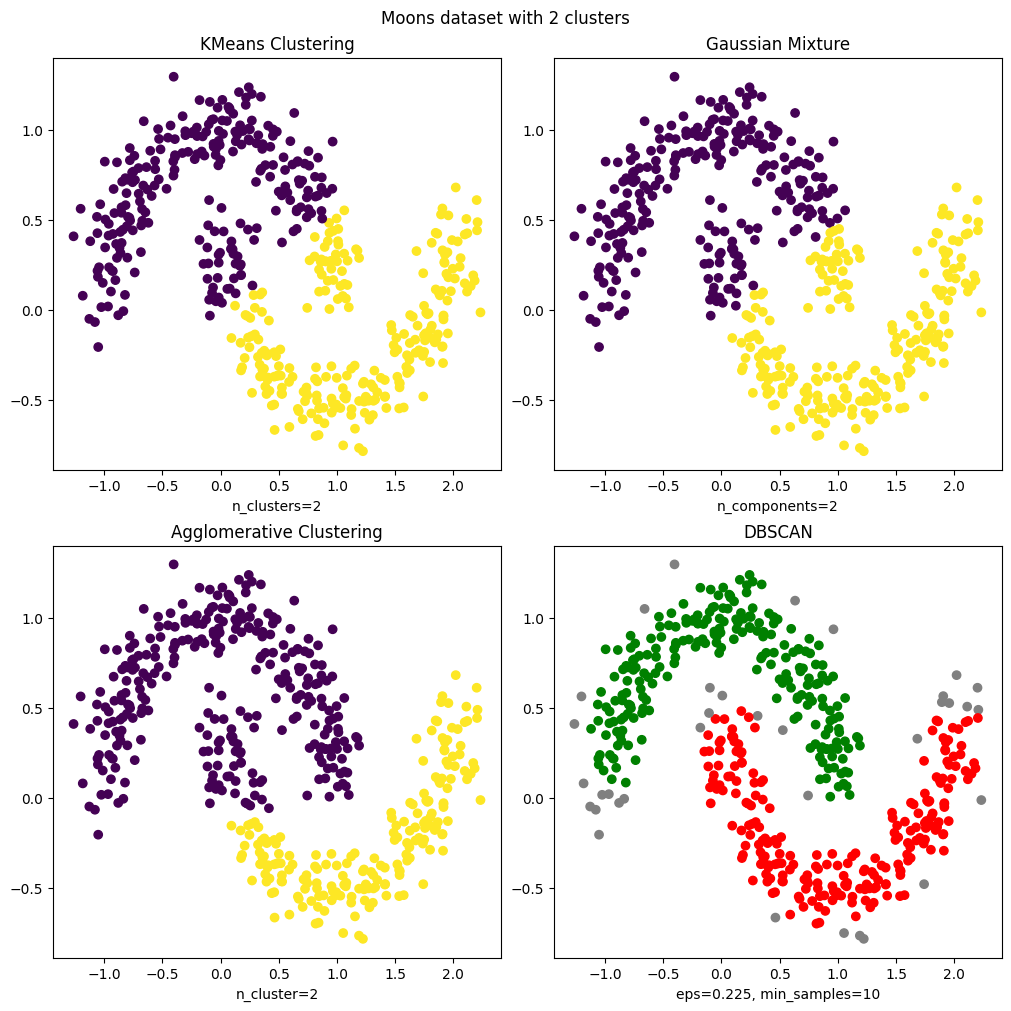

In [ ]:
# train and apply KMeans for n_clusters = 2 and save preditcion in a variable
model = KMeans(n_clusters=2, n_init=random_seed)
pred_K1 = model.fit_predict(moons_scaled)

# plot all clustering Methods with 2 Clusters
f, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(10, 10), layout="constrained" )

# K-Means
ax1.scatter(x_coordm, y_coordm, c=pred_K1)
ax1.set_title("KMeans Clustering")
ax1.set_xlabel("n_clusters=2")

# Gaussian Mixture
ax2.scatter(x_coordm, y_coordm, c=pred_G1)
ax2.set_title("Gaussian Mixture")
ax2.set_xlabel("n_components=2")

# Agglomerative Clustering
ax3.scatter(x_coordm, y_coordm, c=pred_A1)
ax3.set_title("Agglomerative Clustering")
ax3.set_xlabel("n_cluster=2")

# DBSCAN, Noise in grey
ax4.scatter(x_coordm, y_coordm, color=[{0: 'red', 1: 'green', 2: "blue", 3: "orange", 4: "yellow", 5: "pink", 6: "violet", -1:"grey"} [l] for l in pred_DB1])
ax4.set_title("DBSCAN")
ax4.set_xlabel("eps=0.225, min_samples=10")

# add title
f.suptitle("Moons dataset with 2 clusters")